In [6]:
from tqdm import tqdm_notebook as tqdm # Module for tracking progress. conda install -c conda-forge tqdm
import json
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import json
from afinn import Afinn
import seaborn as sns

df = pd.read_csv (r'C:\Users\Saxen\Documents\Polit\Social Data Science\Trustpilot\Trustpilot_data.csv')
df.head()

,Unnamed: 0,website,name,review,rating
0,0,SAXO.COM,Rasmus,Uproblematisk og hurtig levering.,5 stjerner: Fremragende
1,1,SAXO.COM,Dan Jensen,God service...,5 stjerner: Fremragende
2,2,SAXO.COM,Rikke,Super fint. Hurtig levering,5 stjerner: Fremragende
3,3,SAXO.COM,jens haase,spændende plot,5 stjerner: Fremragende
4,4,SAXO.COM,Winnie Ankerdal,Hurtig sikker betjening,5 stjerner: Fremragende


In [7]:
df['rating_n'] = df['rating'].str.extract('(\d+)')

In [8]:
df_cc = pd.DataFrame(df.name.str.split(' ',1).tolist(), columns = ['first_name','surname'])

df['first_name'] = df_cc['first_name']
df['surname'] = df_cc['surname']
df.head()
column_names =['website', 'first_name', 'surname', 'name', 'review', 'rating', 'rating_n']
df=df[column_names]
df.head()

,website,first_name,surname,name,review,rating,rating_n
0,SAXO.COM,Rasmus,None,Rasmus,Uproblematisk og hurtig levering.,5 stjerner: Fremragende,5
1,SAXO.COM,Dan,Jensen,Dan Jensen,God service...,5 stjerner: Fremragende,5
2,SAXO.COM,Rikke,None,Rikke,Super fint. Hurtig levering,5 stjerner: Fremragende,5
3,SAXO.COM,jens,haase,jens haase,spændende plot,5 stjerner: Fremragende,5
4,SAXO.COM,Winnie,Ankerdal,Winnie Ankerdal,Hurtig sikker betjening,5 stjerner: Fremragende,5


In [13]:
df['first_name'] = df['first_name'].str.lower()

In [15]:
df_names = pd.read_excel (r'/Users/Saxen/Documents/Polit/Social Data Science/Trustpilot/Navne.xlsx')
# d for dreng, p for pige og u for unisex


In [16]:
df_names['first_name'] = df_names['first_name'].str.lower()

In [17]:
df_names2 = pd.merge(df, df_names, on='first_name', how='left')

In [18]:
#FInds the number og male and female names
print('Males: ' + str(sum(df_names2.Gender == 'd')),'\n', 'Females: ' + str(sum(df_names2.Gender == 'p')))

Males: 4562 
 Females: 5052


In [19]:
df_names2.count()



website       11259
first_name    11259
surname        7929
name          11259
review        11259
rating        11259
rating_n      11259
Gender        10243
dtype: int64

In [20]:
df_names2.head()
del df_names2['rating']
del df_names2['name']
df_names2['review'] = df_names2['review'].str.lower()

In [21]:
df_names2['review'] = df_names2['review'].str.lower()

In [22]:
df_names2.head()

,website,first_name,surname,review,rating_n,Gender
0,SAXO.COM,rasmus,None,uproblematisk og hurtig levering.,5,d
1,SAXO.COM,dan,Jensen,god service...,5,d
2,SAXO.COM,dan,Jensen,god service...,5,p
3,SAXO.COM,dan,Jensen,god service...,5,u
4,SAXO.COM,rikke,None,super fint. hurtig levering,5,p


In [23]:
afinn = Afinn(language='da',emoticons=True)

df_Afinn = df_names2
df_Afinn['Afinn'] = df_Afinn.review.apply(afinn.score)

df_Afinn.head(10)



,website,first_name,surname,review,rating_n,Gender,Afinn
0,SAXO.COM,rasmus,None,uproblematisk og hurtig levering.,5,d,2.0
1,SAXO.COM,dan,Jensen,god service...,5,d,3.0
2,SAXO.COM,dan,Jensen,god service...,5,p,3.0
3,SAXO.COM,dan,Jensen,god service...,5,u,3.0
4,SAXO.COM,rikke,None,super fint. hurtig levering,5,p,7.0
5,SAXO.COM,jens,haase,spændende plot,5,d,3.0
6,SAXO.COM,winnie,Ankerdal,hurtig sikker betjening,5,p,4.0
7,SAXO.COM,katla,Reehaug,"er rigtig glad for saxo, køber alle mine studi...",4,p,5.0
8,SAXO.COM,tobias,Jensen,"halvanden dag, og stadigvæk intet fra deres ku...",1,d,1.0
9,SAXO.COM,ole,Christensen,leveringen fungerede super godt.hurtig afsende...,5,d,19.0


In [24]:
def word_count(text_string):
    return len(text_string.split())

In [25]:
df_Afinn['word count'] = df_Afinn['review'].apply(word_count)
df_Afinn['relativ_afinn'] = df_Afinn['Afinn'] / df_Afinn['word count']*100
df_Afinn.head()

,website,first_name,surname,review,rating_n,Gender,Afinn,word count,relativ_afinn
0,SAXO.COM,rasmus,None,uproblematisk og hurtig levering.,5,d,2.0,4,50.0
1,SAXO.COM,dan,Jensen,god service...,5,d,3.0,2,150.0
2,SAXO.COM,dan,Jensen,god service...,5,p,3.0,2,150.0
3,SAXO.COM,dan,Jensen,god service...,5,u,3.0,2,150.0
4,SAXO.COM,rikke,None,super fint. hurtig levering,5,p,7.0,4,175.0


C:\Users\Saxen\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Saxen\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Saxen\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


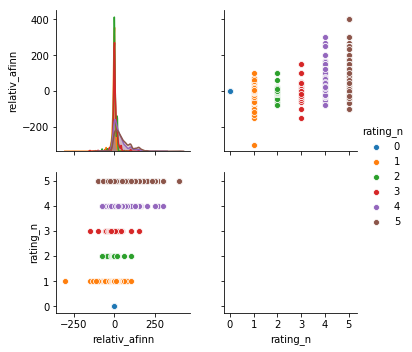

In [30]:
# define columns
sentiment_columns = ['relativ_afinn']
hue = 'rating_n'
sns.pairplot(df_Afinn.sample(10000)[['relativ_afinn']+[hue]], hue=hue)

#sns.set(color_codes=True)
#g = sns.pairplot()
#sns.set(color_codes=True)
#g= sns.pairplot(iris, hue="species",  palette="husl",diag_kws=dict(shade=False) )

In [31]:
df_Afinn.sample(10)

,website,first_name,surname,review,rating_n,Gender,Afinn,word count,relativ_afinn
7427,WWW.WUPTI.COM,simon,None,"jeg er super tilfreds, på hjemmesiden når man ...",5,d,9.0,78,11.538462
4765,SHOPPING.COOP.DK,anne,Marie Kristensen,"fin og hurtig betjening, men hvorfor en papkas...",4,p,4.0,19,21.052632
9315,SWEETDEAL.DK,ellen,None,nemt og hurtigt,5,p,2.0,3,66.666667
2693,WWW.NEMLIG.COM,jan,None,"klart en butik, der hjælper og gør en forskel ...",5,d,3.0,12,25.000000
244,SAXO.COM,rikke,None,super fint. hurtig levering,5,p,7.0,4,175.000000
64,SAXO.COM,sebastian,E.,aaaaaaaaaaaaaa,5,d,0.0,1,0.000000
4834,SHOPPING.COOP.DK,bente,Hedegård Pallesen,alt fungerede fint og cyklen var let at samle ...,4,p,3.0,12,25.000000
1136,SAXO.COM,tobias,Jensen,"halvanden dag, og stadigvæk intet fra deres ku...",1,d,1.0,39,2.564103
3319,WWW.NEMLIG.COM,gitte,P,"det er bare så velfungerende. gode varer, god ...",5,p,10.0,12,83.333333
143,SAXO.COM,henning,Nilausen,enkelt bestilling. hurtig levering. ingen prob...,5,d,0.0,6,0.000000


In [32]:
test = pd.read_csv (r'C:\Users\Saxen\Documents\Polit\Social Data Science\Slides\afin-0.1.tar.gz')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Saxen\\Documents\\Polit\\Social Data Science\\Slides\\afin-0.1.tar.gz'

In [176]:
def uppercase(text_string):
    upper_w = 0
    for word in text_string.split():
        upper_w += word.isupper()
    return upper_w

df_Afinn['upper_words'] = df_Afinn['review'].apply(uppercase)

In [181]:
import re
def exclamation_n(text_string):
    exclamation = 0
    for rev in text_string:
        exclamation = len(re.findall('!', text_string))
    return exclamation

In [190]:
int(df_Afinn['rating_n'])

TypeError: cannot convert the series to <class 'int'>

In [186]:
df_Afinn['exclamation_points'] = 0 
df_Afinn['exclamation_points'] = df_Afinn[df_Afinn['rating_n']<3]['review'].apply(exclamation_n)

ValueError: invalid literal for int() with base 10: 'rating_n'

In [204]:
#df_Afinn['rating_n']=[int(i) for i in df_Afinn['rating_n']]
df_Afinn['rating_n'] = df_Afinn['rating_n'].astype(int)

In [202]:
df_Afinn['exclamation_points'] = 0 
df_Afinn['exclamation_points'] = df_Afinn['rating_n']<3['review'].apply(exclamation_n)

TypeError: 'int' object is not subscriptable

In [211]:
mask = df_Afinn['rating_n'] < 3 

In [212]:
df_Afinn.loc[mask, 'review'] = df_Afinn.loc[mask, 'review'].apply(exclamation_n)

In [220]:
df_Afinn.head(200)

,website,first_name,surname,review,rating_n,Gender,Afinn,Afinn-test,word count,relativ,relativ_afinn,upper_words,exclamation_points
0,SAXO.COM,rasmus,None,uproblematisk og hurtig levering.,5,d,2.0,1,4,50.000000,50.000000,0,0
1,SAXO.COM,dan,Jensen,god service...,5,d,3.0,1,2,150.000000,150.000000,0,0
2,SAXO.COM,dan,Jensen,god service...,5,p,3.0,1,2,150.000000,150.000000,0,0
3,SAXO.COM,dan,Jensen,god service...,5,u,3.0,1,2,150.000000,150.000000,0,0
4,SAXO.COM,rikke,None,super fint. hurtig levering,5,p,7.0,1,4,175.000000,175.000000,0,0
5,SAXO.COM,jens,haase,spændende plot,5,d,3.0,1,2,150.000000,150.000000,0,0
6,SAXO.COM,winnie,Ankerdal,hurtig sikker betjening,5,p,4.0,1,3,133.333333,133.333333,0,0
7,SAXO.COM,katla,Reehaug,"er rigtig glad for saxo, køber alle mine studi...",4,p,5.0,1,60,3.333333,8.333333,0,0
8,SAXO.COM,tobias,Jensen,1,1,d,1.0,1,39,2.564103,2.564103,0,0
9,SAXO.COM,ole,Christensen,leveringen fungerede super godt.hurtig afsende...,5,d,19.0,1,21,76.190476,90.476190,0,0


In [43]:
rev_afinn = pd.read_csv (r'C:\Users\Saxen\Documents\Polit\Social Data Science\Slides\Trustpilot\Afinn_adj.csv')
df_adj = pd.DataFrame(rev_afinn)
df_adj.columns = ['word']

df_adj = pd.DataFrame(df_adj.word.str.split(';').tolist(), columns=["word", 'point', 'adjustment'])
df_adj.head()

,word,point,adjustment
0,absorberet,1,
1,acceptere,1,
2,accepterede,1,
3,accepterer,1,
4,accepteres,1,


In [ ]:
df_Afinn['adj afinn'] = 